#### Task 1: (100 pts)    
- Member: (60 pts)
    - **M1.1** Understand the distribution and measures of center for US opioid mortality for 2019 (20 pts)
         - Import the super dataframe created in Stage I
         - Create a histogram of Normalized Deaths variable for entire US as a distribution. 
             - https://plotly.com/python/histograms/#histograms-with-gohistogram
             - https://plotly.com/python/histograms/
         - Add a vertical line to the histogram representing the ***mean*** Normalized Opioid Death for US. 
             - You should be able to do that with `fig.add_vline()`
             - https://plotly.com/python/horizontal-vertical-shapes/
         - Add another line for ***median*** to compare

In [31]:
import pandas as pd
import plotly.express as px

super_df = pd.read_csv('Merged_DataFrame.csv')



### Create a histogram of Normalized Deaths variable for entire US as a distribution.

In [32]:
fig = px.histogram(super_df, x="Norm_Deaths", opacity = 0.85,title = "US 2019 Opioid Related Norm_Death Distribution, Mean>Median")


### Add a vertical line to the histogram representing the ***mean*** Normalized Opioid Death for US. 


In [33]:
fig.add_vline(x=super_df['Norm_Deaths'].mean(),line_dash="dash",annotation_text="Mean", annotation_position="top right")



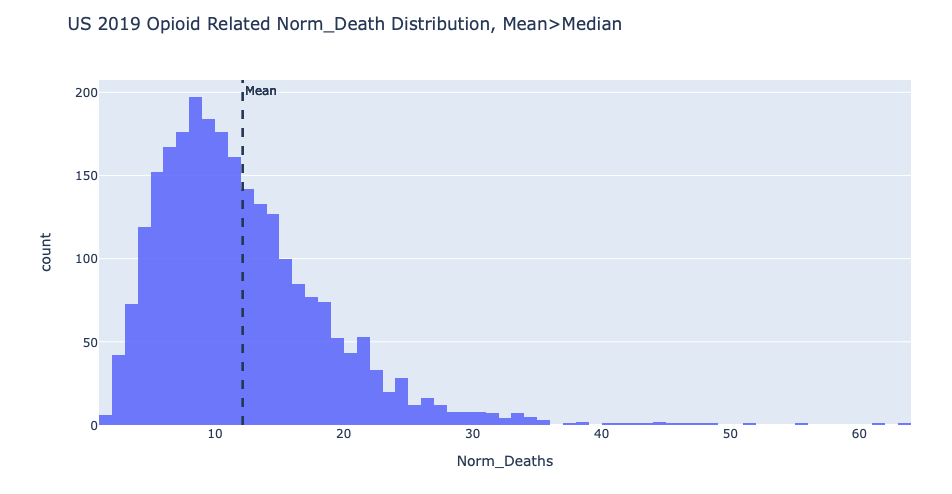

In [34]:
from IPython.display import Image
Image("screeshots/mean.png")

### Add another line for ***median*** to compare


In [35]:
fig.add_vline(x=super_df['Norm_Deaths'].median(),line_dash="dot",annotation_text="Median", annotation_position="top left")
fig.show()

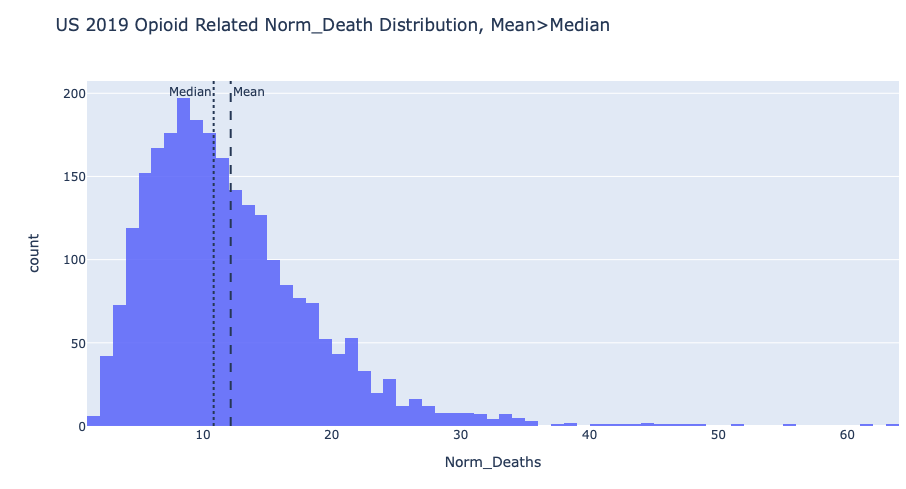

In [36]:
from IPython.display import Image
Image("screeshots/median.png")

#### Task 1: (100 pts)    
- Member: (60 pts)
    - **M1.2** Understand variable to mortality relationships for 2019 data (40 pts)
        - Here we codify the column Normalized Deaths (Number of Deaths per 100k Population - `Norm_Deaths`) and store it as a `label` column. (10 pts)
            - The codification is based on the quantile distribution of the Normalized deaths. i.e.
                - Very Low (v_low) - [1.999 - 8.0]
                - Low (low) - [8.0 - 11.0]
                - High (high) - [11.0 - 16.0]
                - Very High (v_high) - [16.0 - 64.0]
        - Now try the variables you have identified in Stage I and plot them as a second variable to Normalized Mortality in a scatter plot to observe any trends. (20 pts)
            - For example, if you said population was a indicator, then used population values as the your `y` in scatter plot where `x` is your Normalized Mortality
        - Describe any trends you observe. (10 pts)
        - ***Extra credit (additional 20 pts)***
            - Develop the above approach as a Plotly widget for jupyter, where you can try out the variables dynamically in a simple dashboard. The variables can be in a dropdown. 
            - https://plotly.com/python/figurewidget-app/

- minimum Norm_Deaths im my data frame is less than 1.999. So, I'll changhe the 1.999 to 0.
- I use pandas cut() method to catagorize values in Norm_Deaths columns into four categories
- cut() method takes an input series that need to be grouped into various bins.
- cut() method takes a list of values that begins with the smallest value for the first bin and ends with the maximum value for the last bin. Break points between the bins also exist in the list. Here, I assumed the lower band to be inclusive. 
- cut() method also takes a list of bins name. This list have one element less than bin list.

In [37]:
super_df['label'] = pd.cut(super_df['Norm_Deaths'], bins = [0,8,11,16,64], labels = ['v_low','low','high','v_high'] , include_lowest=True)
super_df['label'].unique()

['v_low', 'v_high', 'low', 'high']
Categories (4, object): ['v_low' < 'low' < 'high' < 'v_high']

- In my first trial, I selected 10 columns that I believed correlated well with Norm_Death column.
- When creating the scatter plot, I thought it'll be useful to add a trendline to my visuall and color code observation based on the categories defined above. For trendline I used OLS method or ordinary least squre approach. However, I am not sure if this is a right method or if there are other methods available. Assuming trendline_scope as overall will not create separate trendlines for various categories.
- Only five out of ten variables that I have initially selected show strong visuall correlation wih the Norm_Deaths variable. These are 'Drug arrest raw values', 'Communicable disease raw value', 'Total male population raw value', 'Hate crimes raw value' and 'Cancer incidence raw value' variables. I think I need to take a look at most columns and come up with a better selection!
 

#### Because the values of variables are not in the same period, showing them in subplots is not a good idea. So I create different scatter plots for each of them.

Text(0.5, 1.0, 'Drug arrests raw value')

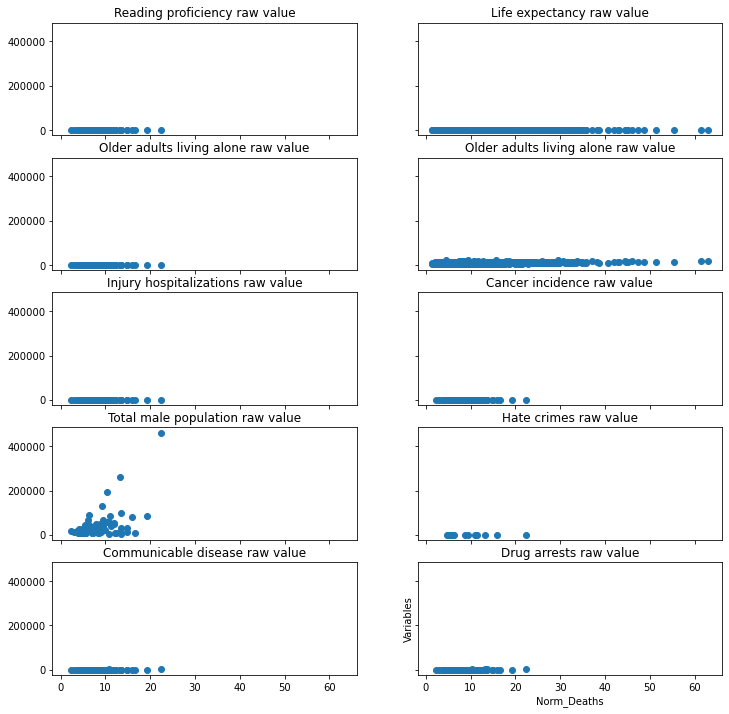

In [38]:
import matplotlib.pyplot as plt 

q1 = super_df['Reading proficiency raw value']
x = super_df['Norm_Deaths']
q2 = super_df['Life expectancy raw value']
q3 = super_df['Older adults living alone raw value']
q4 = super_df['Premature death raw value']
q5 = super_df['Injury hospitalizations raw value']
q6 = super_df['Cancer incidence raw value']
q7 = super_df['Total male population raw value']
q8 = super_df['Hate crimes raw value']
q9 = super_df['Communicable disease raw value']
q10 = super_df['Drug arrests raw value']

fig, axes = plt.subplots(5, 2, figsize=(12, 12), sharex=True, sharey=True)

plt.xlabel("Norm_Deaths")
plt.ylabel("Variables")
axes[0,0].scatter(x, q1)
axes[0,0].set_title("Reading proficiency raw value")

axes[0,1].scatter(x, q2)
axes[0,1].set_title("Life expectancy raw value")

axes[1,0].scatter(x, q3)
axes[1,0].set_title("Older adults living alone raw value")

axes[1,1].scatter(x, q4)
axes[1,1].set_title("Older adults living alone raw value")

axes[2,0].scatter(x, q5)
axes[2,0].set_title('Injury hospitalizations raw value')

axes[2,1].scatter(x, q6)
axes[2,1].set_title('Cancer incidence raw value')

axes[3,0].scatter(x, q7)
axes[3,0].set_title('Total male population raw value')

axes[3,1].scatter(x, q8)
axes[3,1].set_title('Hate crimes raw value')

axes[4,0].scatter(x, q9)
axes[4,0].set_title('Communicable disease raw value')

axes[4,1].scatter(x, q10)
axes[4,1].set_title('Drug arrests raw value')

In [39]:
px.scatter(super_df, x="Norm_Deaths", y='Reading proficiency raw value', trendline="ols",color='label',trendline_scope="overall")



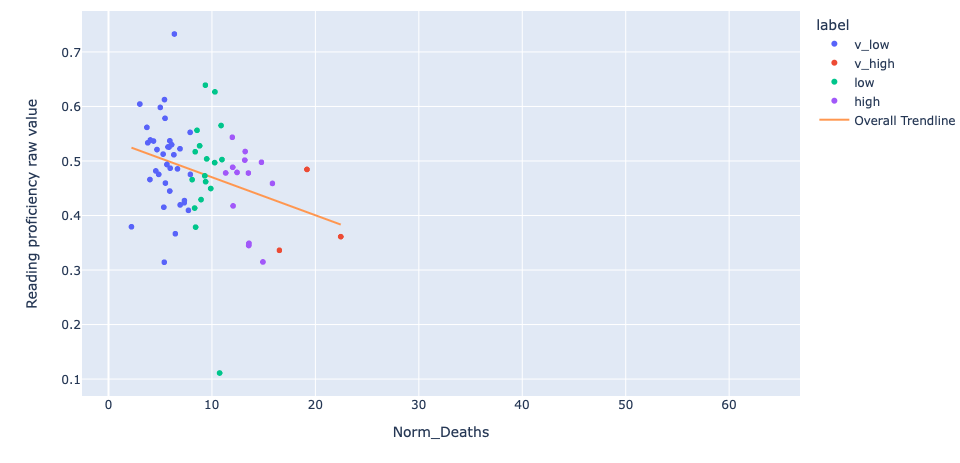

In [40]:
from IPython.display import Image
Image("screeshots/R.png")

In [41]:
px.scatter(super_df, x="Norm_Deaths", y='Life expectancy raw value', trendline="ols",color='label',trendline_scope="overall")



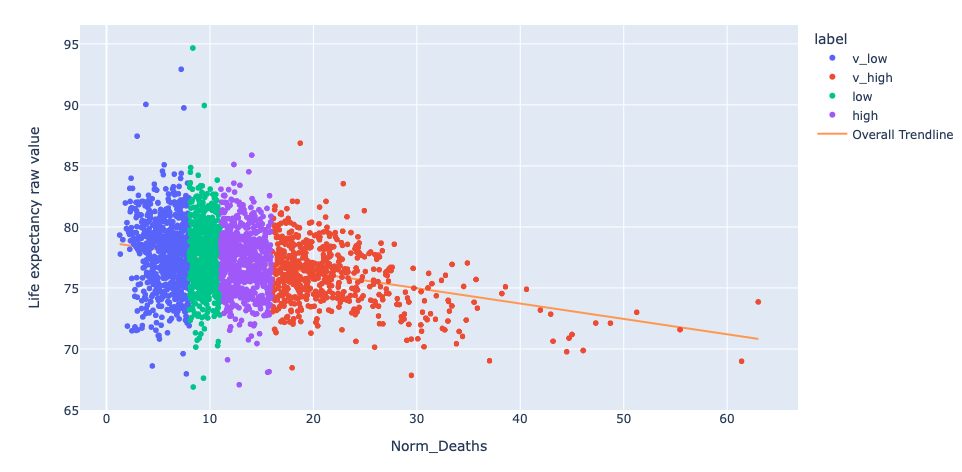

In [42]:
from IPython.display import Image
Image("screeshots/l.png")

In [43]:
px.scatter(super_df, x="Norm_Deaths", y='Older adults living alone raw value', trendline="ols",color='label',trendline_scope="overall")

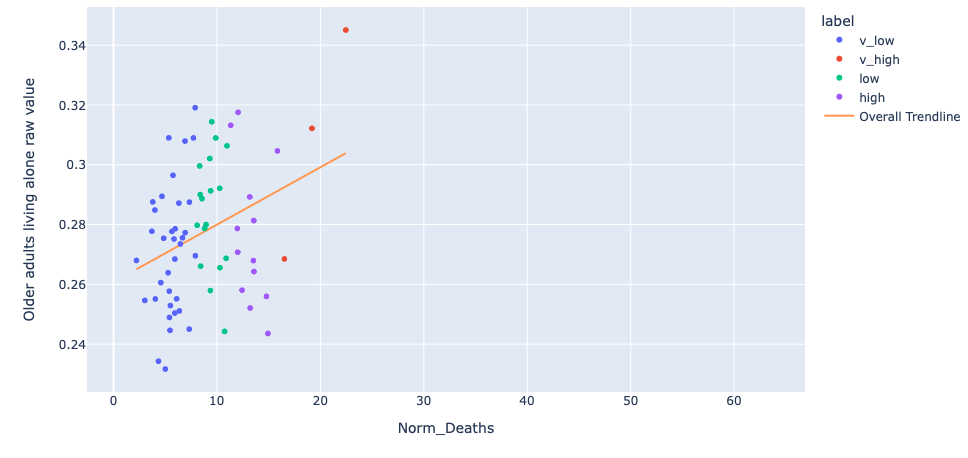

In [44]:
from IPython.display import Image
Image("screeshots/o.png")

In [45]:
px.scatter(super_df, x="Norm_Deaths", y='Premature death raw value', trendline="ols",color='label',trendline_scope="overall")

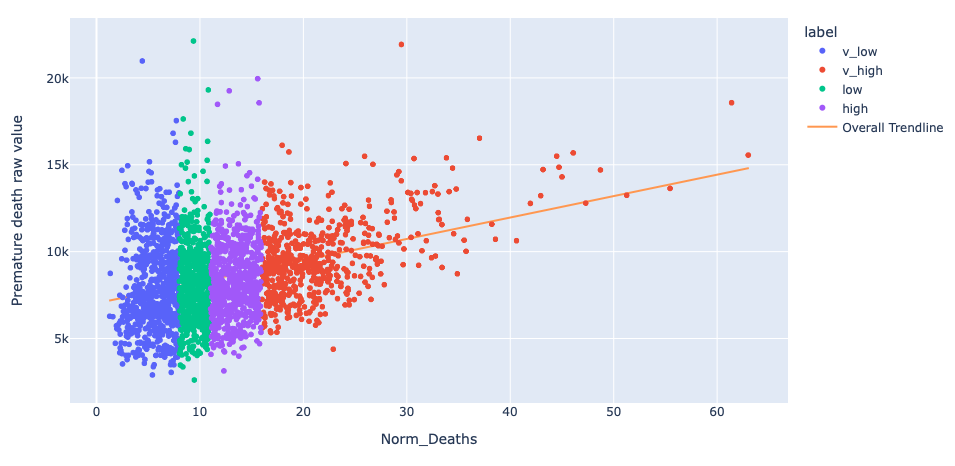

In [46]:
from IPython.display import Image
Image("screeshots/p.png")

In [47]:
px.scatter(super_df, x="Norm_Deaths", y='Injury hospitalizations raw value', trendline="ols",color='label',trendline_scope="overall")

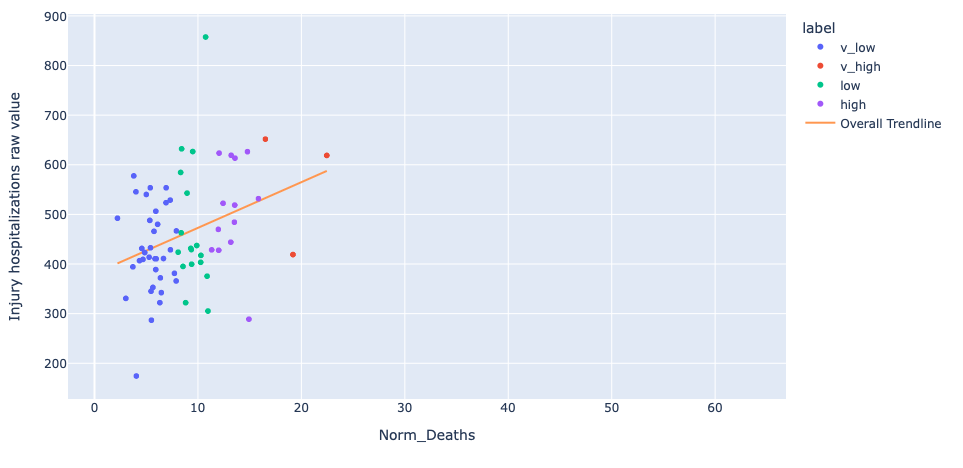

In [48]:
from IPython.display import Image
Image("screeshots/i.png")

In [49]:
px.scatter(super_df, x="Norm_Deaths", y='Cancer incidence raw value', trendline="ols",color='label',trendline_scope="overall")

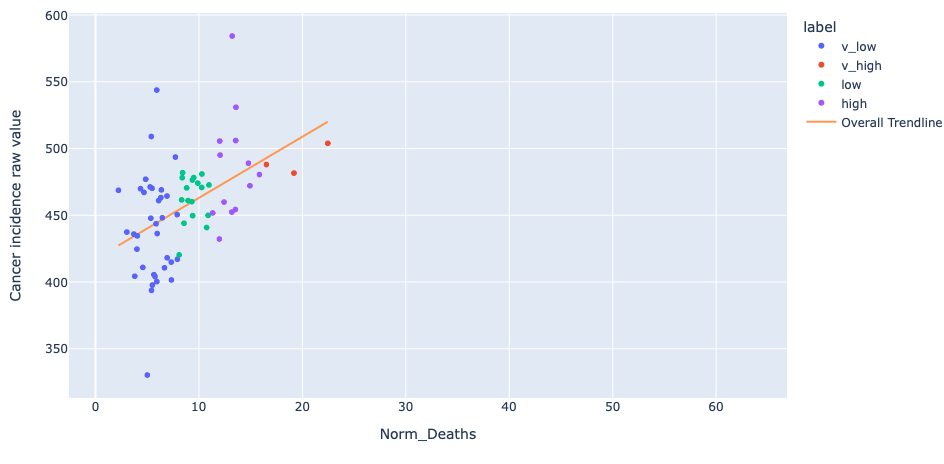

In [50]:
from IPython.display import Image
Image("screeshots/c.png")

In [51]:
px.scatter(super_df, y='Hate crimes raw value', x="Norm_Deaths", trendline="ols",color='label',trendline_scope="overall")

In [52]:
px.scatter(super_df, y='Total male population raw value', x="Norm_Deaths",trendline="ols",color='label',trendline_scope="overall")

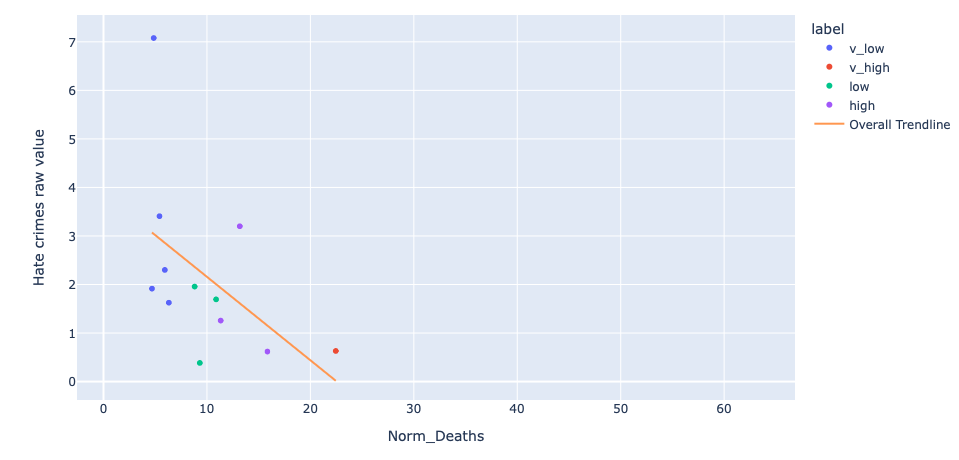

In [53]:
from IPython.display import Image
Image("screeshots/h.png")

In [54]:
px.scatter(super_df, y='Communicable disease raw value', x="Norm_Deaths",trendline="ols",color='label',trendline_scope="overall")

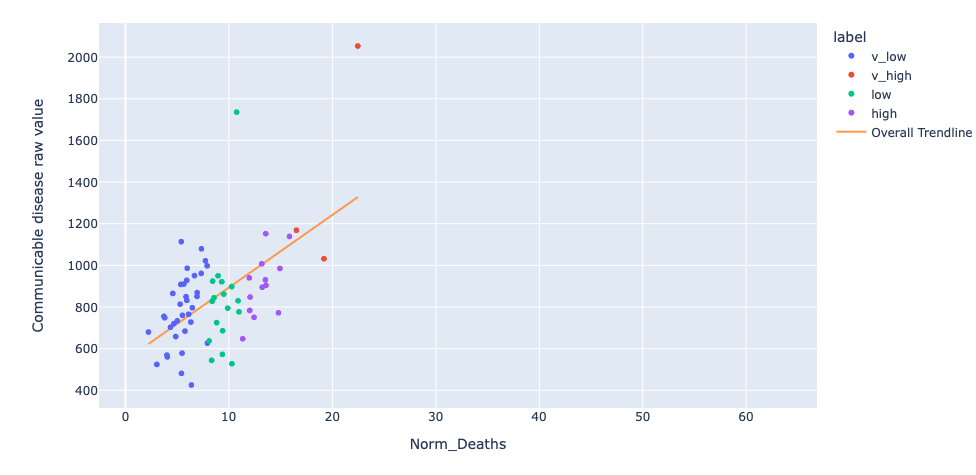

In [55]:
from IPython.display import Image
Image("screeshots/co.png")

In [56]:
px.scatter(super_df, y='Drug arrests raw value', x="Norm_Deaths",trendline="ols",color='label',trendline_scope="overall")

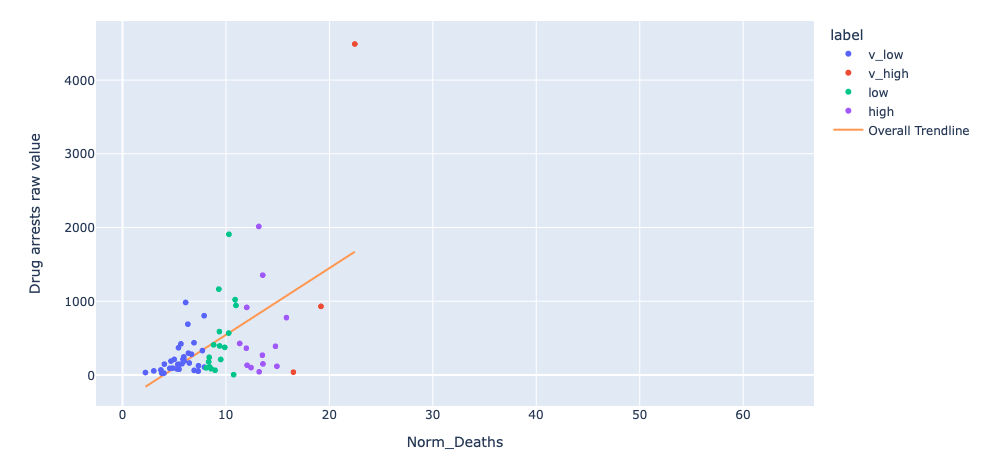

In [57]:
from IPython.display import Image
Image("screeshots/d.png")

- I used "Plotly widget" to develop a dashboard to visually see how these variables intract wih Norm_Death variable.
- So, I first created a list of these ten variables and named it as independent variables. Then, I created the widgets dropdown that can only takes values in this list. Then I followed the guidlines in provided link and added one line of code to show the scatter plot as well as the dropdown. When creating the scatter plot, I thought it'll be useful to add a trendline to my visuall and color code observation based on the categories defined above. For trendline I used OLS method or ordinary least squre approach. However, I am not sure if this is a right method or if there are other methods available. Assuming trendline_scope as overall will not create separate trendlines for various categories.

In [58]:
import plotly.graph_objects as go
from ipywidgets import widgets

independent_variables = ['Reading proficiency raw value','Life expectancy raw value','Older adults living alone raw value','Premature death raw value'
,'Injury hospitalizations raw value','Cancer incidence raw value','Hate crimes raw value','Total male population raw value','Communicable disease raw value','Drug arrests raw value']


X_Columns = widgets.Dropdown(
    options= independent_variables,
    description='X axis column',
)


g = go.FigureWidget(px.scatter(super_df, x=X_Columns.value, y="Norm_Deaths",trendline="ols",color='label',trendline_scope="overall"),
                    layout=go.Layout())
                    

def validate():
    if X_Columns.value in independent_variables:
        return True
    else:
        return False


def response(change):
    if validate():
        tmp_df = super_df
        with g.batch_update():
            g.data[0].x = tmp_df[X_Columns.value]
            g.layout.xaxis.title = X_Columns.value


X_Columns.observe(response, names="value")
container = widgets.HBox([X_Columns])
widgets.VBox([container,g])

